## Importing all the required Libraries

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D,AveragePooling2D, BatchNormalization,Dropout
from tensorflow.keras import datasets


from sklearn.preprocessing import StandardScaler

In [141]:
(X_train,y_train), (X_test,y_test) = datasets.mnist.load_data()

In [142]:
X_train.shape

(60000, 28, 28)

In [156]:
channels = X_train.shape[-1]

In [157]:
channels

28

In [155]:
X_train[0].shape

(28, 28)

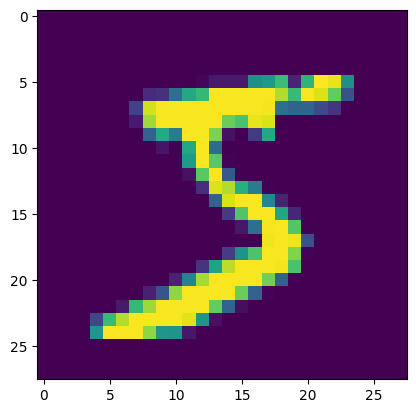

In [144]:
plt.imshow(X_train[0])      

In [145]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [166]:
## Defining the CNN architecture

model = Sequential(
    name = 'Baseline_Model',
    layers = [Conv2D(32, kernel_size = (3,3), padding = 'valid', activation = 'relu', input_shape=(28,28,1)),
              MaxPooling2D(pool_size = (2,2)),

              BatchNormalization(),
              Dropout(0.5),

              Conv2D(64, kernel_size = (3,3), padding = 'valid', activation = 'relu'),
              MaxPooling2D(pool_size = (2,2)),

              BatchNormalization(),
              Dropout(0.5),

              Conv2D(128, kernel_size = (3,3), padding = 'valid', activation = 'relu'),
              MaxPooling2D(pool_size = (2,2)),

              BatchNormalization(),
              Dropout(0.5),
            

              Flatten(),
              Dense(128, activation = 'relu'),
              Dropout(0.5),
              Dense(64,activation = 'relu'),
              Dropout(0.5),
              Dense(10, activation = 'softmax')
              ]
    )

In [167]:
model.summary()

Model: "Baseline_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_69 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_33 (Bat  (None, 13, 13, 32)       128       
 chNormalization)                                                
                                                                 
 dropout_35 (Dropout)        (None, 13, 13, 32)        0         
                                                                 
 conv2d_70 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 5, 5, 64)      

In [168]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

In [169]:
history = model.fit(
    X_train_scaled,
    y_train,
    batch_size = 64,
    epochs= 100,
    callbacks = [tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience= 3)],
    validation_split = 0.2
)

Epoch 1/100
750/750 [==============================] - 12s 15ms/step - loss: 1.3168 - accuracy: 0.6697 - val_loss: 0.4747 - val_accuracy: 0.8672
Epoch 2/100
750/750 [==============================] - 10s 14ms/step - loss: 0.3899 - accuracy: 0.8898 - val_loss: 0.1597 - val_accuracy: 0.9518
Epoch 3/100
750/750 [==============================] - 11s 14ms/step - loss: 0.2670 - accuracy: 0.9240 - val_loss: 0.1104 - val_accuracy: 0.9653
Epoch 4/100
750/750 [==============================] - 11s 15ms/step - loss: 0.2254 - accuracy: 0.9376 - val_loss: 0.0902 - val_accuracy: 0.9712
Epoch 5/100
750/750 [==============================] - 11s 15ms/step - loss: 0.2042 - accuracy: 0.9436 - val_loss: 0.0924 - val_accuracy: 0.9717
Epoch 6/100
750/750 [==============================] - 12s 16ms/step - loss: 0.1821 - accuracy: 0.9483 - val_loss: 0.0768 - val_accuracy: 0.9756
Epoch 7/100
750/750 [==============================] - 12s 15ms/step - loss: 0.1748 - accuracy: 0.9501 - val_loss: 0.0733 - val_ac

In [170]:
history.history

{'loss': [1.3168219327926636,
  0.3898813724517822,
  0.26700207591056824,
  0.2254330962896347,
  0.20417948067188263,
  0.18205790221691132,
  0.17478936910629272,
  0.1635424643754959,
  0.15596741437911987,
  0.15346381068229675,
  0.15004763007164001,
  0.14816001057624817,
  0.14420995116233826,
  0.1509290188550949,
  0.1442880481481552,
  0.14664193987846375],
 'accuracy': [0.6696666479110718,
  0.8898333311080933,
  0.9240208268165588,
  0.937624990940094,
  0.9436458349227905,
  0.9482707977294922,
  0.950124979019165,
  0.95354163646698,
  0.9570000171661377,
  0.957770824432373,
  0.9590833187103271,
  0.9609999656677246,
  0.9606041312217712,
  0.9602708220481873,
  0.9627082943916321,
  0.9632708430290222],
 'val_loss': [0.4746682047843933,
  0.1597176492214203,
  0.11041934043169022,
  0.09015482664108276,
  0.09236656874418259,
  0.0767734944820404,
  0.07334523648023605,
  0.09364298731088638,
  0.07196696102619171,
  0.07464757561683655,
  0.09774413704872131,
  0.089

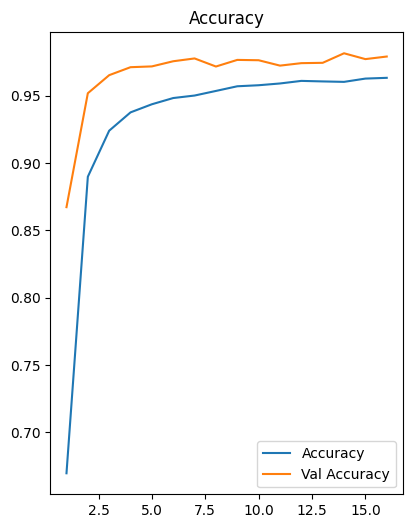

In [171]:
def plot_accuaracy(history = history):

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    epochs = np.arange(1,len(val_accuracy) + 1)

    plt.figure(figsize=(10,6))

    plt.subplot(1,2,1)
    plt.title('Accuracy')
    plt.plot(epochs, accuracy, label = 'Accuracy')
    plt.plot(epochs, val_accuracy, label = 'Val Accuracy')
    plt.legend()
    plt.show()
    


plot_accuaracy(history)


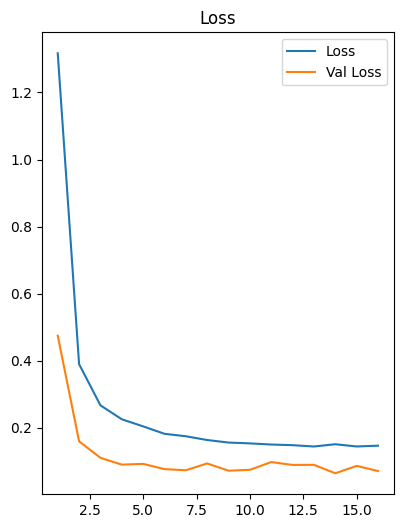

In [172]:
def plot_loss(history = history):

    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = np.arange(1,len(val_loss) + 1)

    plt.figure(figsize=(10,6))

    plt.subplot(1,2,1)
    plt.title('Loss')
    plt.plot(epochs, loss, label = 'Loss')
    plt.plot(epochs, val_loss, label = 'Val Loss')
    plt.legend()
    plt.show()
    


plot_loss(history)


In [174]:
model.evaluate(X_test_scaled,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0762 - accuracy: 0.9796


[0.07620511204004288, 0.9796000719070435]

In [176]:
y_hat = model.predict(X_test_scaled)

313/313 [==============================] - 1s 2ms/step


In [196]:
y_pred = []

for i in range(0,y_hat.shape[0]):
    #print(i)
    y_pred.append(np.argmax(y_hat[i]))

In [197]:
X_test.shape

(10000, 28, 28)

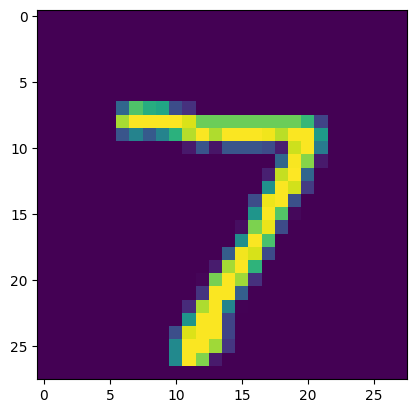

In [198]:
plt.imshow(X_test[0])

In [199]:
y_pred[0]

7

In [222]:
# plotting it for mutiple random sample: 
import random

def test_random_sample():    
    sample_index = random.randint(0, 100)
    print(sample_index)
    x_sample, y_sample = X_test[sample_index], y_test[sample_index]
    output = y_pred[sample_index]
    plt.rcParams["figure.figsize"] = [2, 2]
    plt.imshow(x_sample)
    plt.axis('off')
    print(f"Predicting on image sample {sample_index} from test data")
    print(f"Prediction : {output}")
    print(f"Actual : {y_sample}")
    plt.show()

93
Predicting on image sample 93 from test data
Prediction : 3
Actual : 3


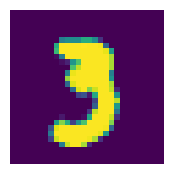

------------------
87
Predicting on image sample 87 from test data
Prediction : 3
Actual : 3


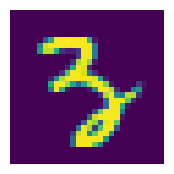

------------------
58
Predicting on image sample 58 from test data
Prediction : 9
Actual : 9


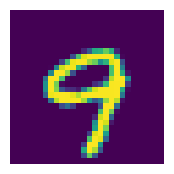

------------------
23
Predicting on image sample 23 from test data
Prediction : 5
Actual : 5


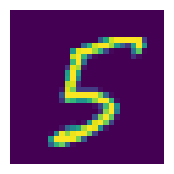

------------------
94
Predicting on image sample 94 from test data
Prediction : 1
Actual : 1


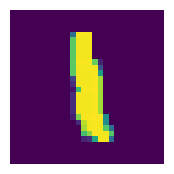

------------------
54
Predicting on image sample 54 from test data
Prediction : 6
Actual : 6


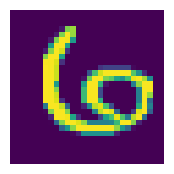

------------------
6
Predicting on image sample 6 from test data
Prediction : 4
Actual : 4


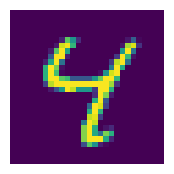

------------------
24
Predicting on image sample 24 from test data
Prediction : 4
Actual : 4


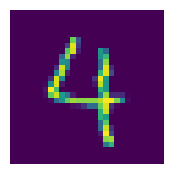

------------------
70
Predicting on image sample 70 from test data
Prediction : 7
Actual : 7


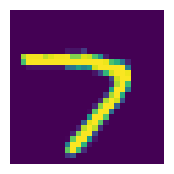

------------------
2
Predicting on image sample 2 from test data
Prediction : 1
Actual : 1


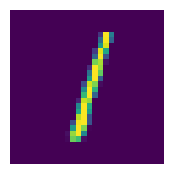

------------------


In [224]:
for i in range(1,11):
    test_random_sample()
    print('------------------')